# Time Series Forecasting with ARIMAX, SARIMAX and PROPHET
## by Vesna Pop-Dimitrijoska
---

WebTrafic dataset, device: **TABLET**

---

# Task

Time Series Forecasting with ARIMA, SARIMA and PROPHET the Web Traffic dataset for each device type (separately) and forecast the total cumulaive traffic. 

---
## Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import itertools
from summarytools import dfSummary
import matplotlib.pyplot as plt
import seaborn as sns

#Time-series Forecasting
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import prophet
from prophet.plot import plot_plotly, plot_components_plotly

from sklearn.model_selection import ParameterGrid

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

## Read the Dataset

In [2]:
df_org = pd.read_csv('df_tablet_final.csv',index_col=0, parse_dates=['Date'])
df = df_org.copy()

## Train-test split

In [3]:
# Train-test split 
train_tablet = df.loc[df.index <  pd.Timestamp('2018-04-01')]
test_tablet  = df.loc[df.index >= pd.Timestamp('2018-04-01')]

In [4]:
# Generate all different combinations of p, q and q triplets

p = range(0, 15)
d = range(0, 4)
q = range(0, 4)

pdq = list(itertools.product(p, d, q))

---
## Time Series Forecasting with ARIMA

In [5]:
best_mape = float('inf')
best_order = None

for order in pdq:
    p, d, q = order
    model_ARIMA = ARIMA(train_tablet['Sessions'],
                  exog=None,
                  order=(p, d, q),
                  seasonal_order=(0, 0, 0, 0), 
                  trend=None, 
                  enforce_stationarity=True, 
                  freq='D')
    
    results = model_ARIMA.fit()
    results = results.forecast(steps=len(test_tablet))
   
    mape = mean_absolute_percentage_error(test_tablet['Sessions'], results)
    print(f'(p, d, q) order: {order}, with MAPE = {round(mape*100, 2)}%')

    if mape < best_mape:
        best_mape = mape
        best_order = order
        
print('-------------------------------------------------')
print('Best model:')
print(f'(p, d, q) -> {best_order} with MAPE = {round(best_mape*100, 2)}%')


(p, d, q) order: (0, 0, 0), with MAPE = 5.04%
(p, d, q) order: (0, 0, 1), with MAPE = 5.04%
(p, d, q) order: (0, 0, 2), with MAPE = 5.04%
(p, d, q) order: (0, 0, 3), with MAPE = 5.04%
(p, d, q) order: (0, 1, 0), with MAPE = 3.25%
(p, d, q) order: (0, 1, 1), with MAPE = 3.38%
(p, d, q) order: (0, 1, 2), with MAPE = 3.46%
(p, d, q) order: (0, 1, 3), with MAPE = 3.51%
(p, d, q) order: (0, 2, 0), with MAPE = 97.42%
(p, d, q) order: (0, 2, 1), with MAPE = 3.28%
(p, d, q) order: (0, 2, 2), with MAPE = 3.22%
(p, d, q) order: (0, 2, 3), with MAPE = 3.26%
(p, d, q) order: (0, 3, 0), with MAPE = 32504.4%
(p, d, q) order: (0, 3, 1), with MAPE = 72.95%
(p, d, q) order: (0, 3, 2), with MAPE = 5.05%
(p, d, q) order: (0, 3, 3), with MAPE = 6.67%
(p, d, q) order: (1, 0, 0), with MAPE = 5.03%
(p, d, q) order: (1, 0, 1), with MAPE = 4.08%
(p, d, q) order: (1, 0, 2), with MAPE = 3.98%
(p, d, q) order: (1, 0, 3), with MAPE = 3.93%
(p, d, q) order: (1, 1, 0), with MAPE = 3.18%
(p, d, q) order: (1, 1, 1), w

(p, d, q) order: (11, 0, 2), with MAPE = 3.78%
(p, d, q) order: (11, 0, 3), with MAPE = 3.84%
(p, d, q) order: (11, 1, 0), with MAPE = 3.21%
(p, d, q) order: (11, 1, 1), with MAPE = 3.56%
(p, d, q) order: (11, 1, 2), with MAPE = 3.56%
(p, d, q) order: (11, 1, 3), with MAPE = 3.55%
(p, d, q) order: (11, 2, 0), with MAPE = 4.56%
(p, d, q) order: (11, 2, 1), with MAPE = 3.09%
(p, d, q) order: (11, 2, 2), with MAPE = 3.09%
(p, d, q) order: (11, 2, 3), with MAPE = 3.1%
(p, d, q) order: (11, 3, 0), with MAPE = 10.18%
(p, d, q) order: (11, 3, 1), with MAPE = 7.5%
(p, d, q) order: (11, 3, 2), with MAPE = 7.38%
(p, d, q) order: (11, 3, 3), with MAPE = 5.92%
(p, d, q) order: (12, 0, 0), with MAPE = 4.75%
(p, d, q) order: (12, 0, 1), with MAPE = 3.84%
(p, d, q) order: (12, 0, 2), with MAPE = 3.75%
(p, d, q) order: (12, 0, 3), with MAPE = 3.74%
(p, d, q) order: (12, 1, 0), with MAPE = 3.22%
(p, d, q) order: (12, 1, 1), with MAPE = 3.56%
(p, d, q) order: (12, 1, 2), with MAPE = 3.56%
(p, d, q) orde

In [6]:
model_ARIMA = ARIMA(train_tablet['Sessions'],
              exog=None,
              order = (best_order[0], best_order[1], best_order[2]),
              seasonal_order=(0, 0, 0, 0), 
              trend=None, 
              enforce_stationarity=True, 
              freq='D')

results = model_ARIMA.fit()

print(results.summary())

results = results.forecast(steps = len(test_tablet))

                               SARIMAX Results                                
Dep. Variable:               Sessions   No. Observations:                 1551
Model:                ARIMA(14, 2, 0)   Log Likelihood                -700.202
Date:                Sat, 21 Oct 2023   AIC                           1430.404
Time:                        22:05:09   BIC                           1510.585
Sample:                    01-01-2014   HQIC                          1460.226
                         - 03-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6560      0.023    -71.309      0.000      -1.701      -1.610
ar.L2         -2.0577      0.046    -44.857      0.000      -2.148      -1.968
ar.L3         -2.3455      0.067    -34.994      0.0

In [7]:
y_test = test_tablet['Sessions']
y_pred = results

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Preformance metrics for ARIMA model:')
print('--------------------------------------')
print('MAE:   ', round(mae, 2))
print('RMSE:  ', round(rmse, 2))
print('R2:    ', round(r2*100, 2))
print('MAPE:  ', round(mape*100, 2), '%')

Preformance metrics for ARIMA model:
--------------------------------------
MAE:    0.34
RMSE:   0.43
R2:     4.55
MAPE:   3.02 %


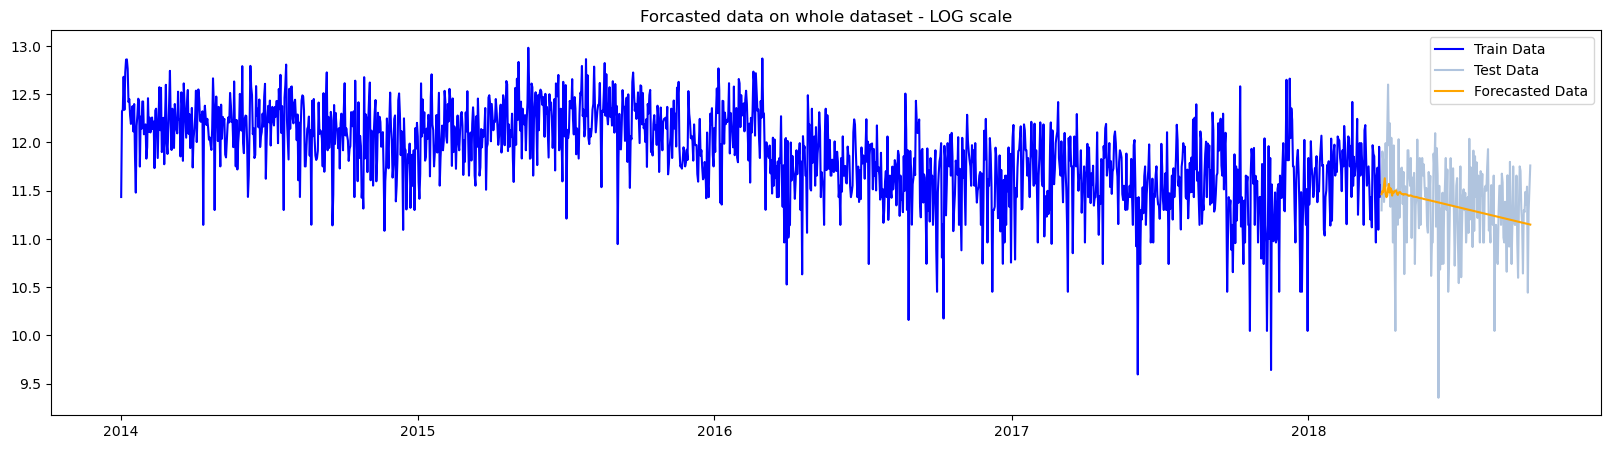

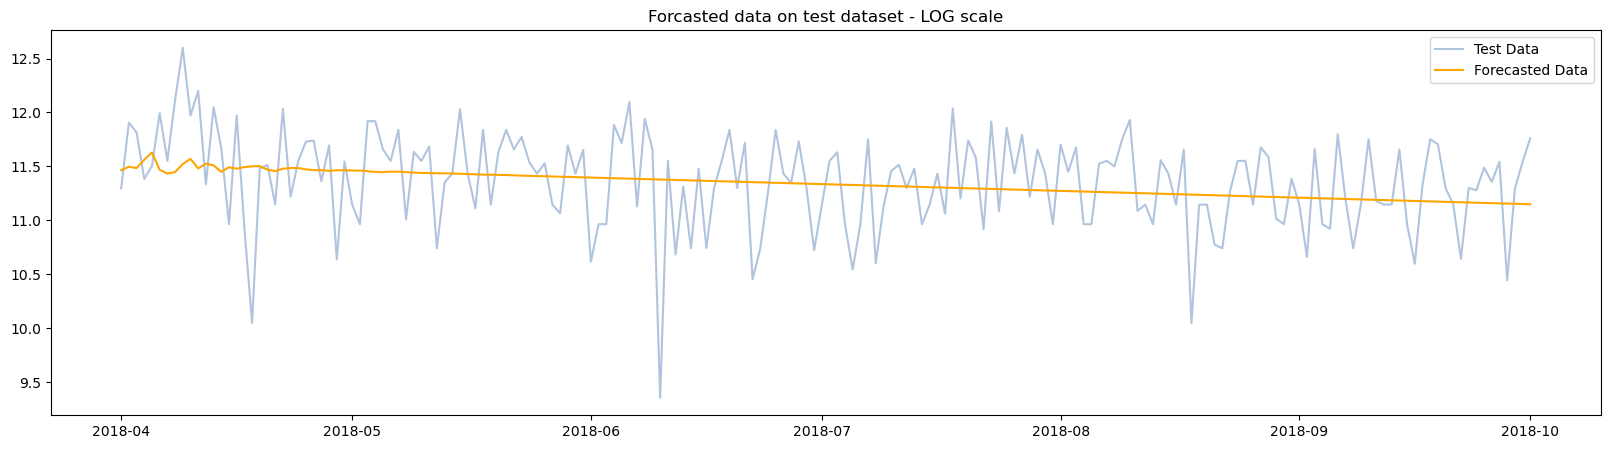

In [8]:
# Forcasted data in LOG scale

Train = train_tablet['Sessions']
Test = test_tablet['Sessions']
Forecast = results

plt.figure(figsize=[20,5])
plt.plot(Train, color='blue', label='Train Data')
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on whole dataset - LOG scale')
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on test dataset - LOG scale')
plt.legend()
plt.show()

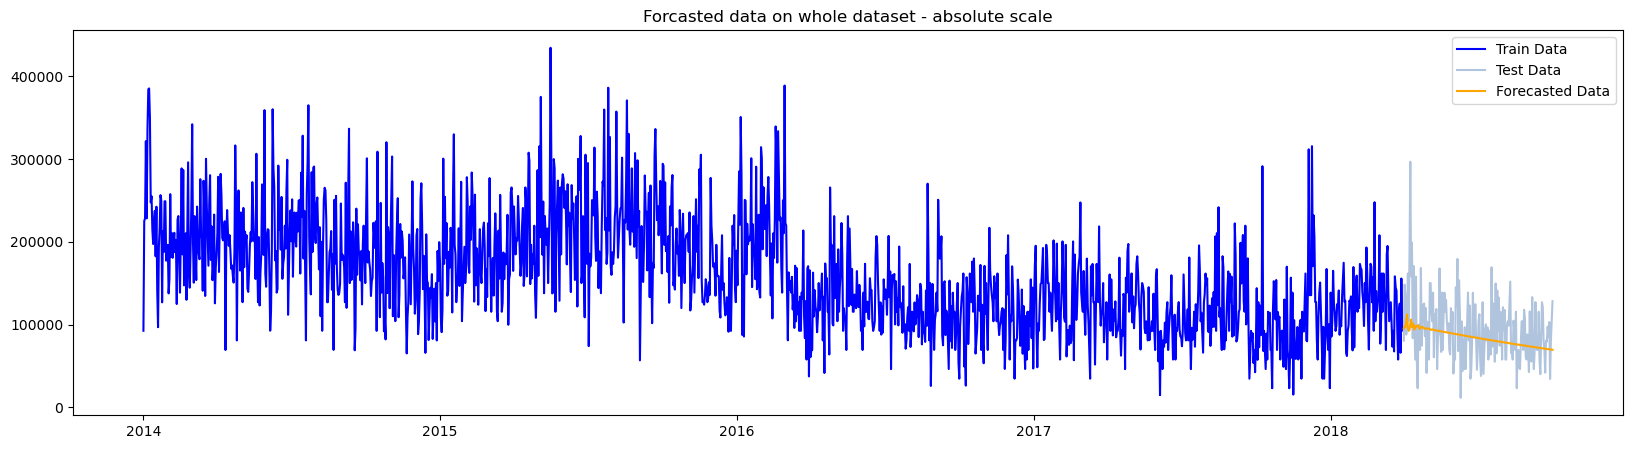

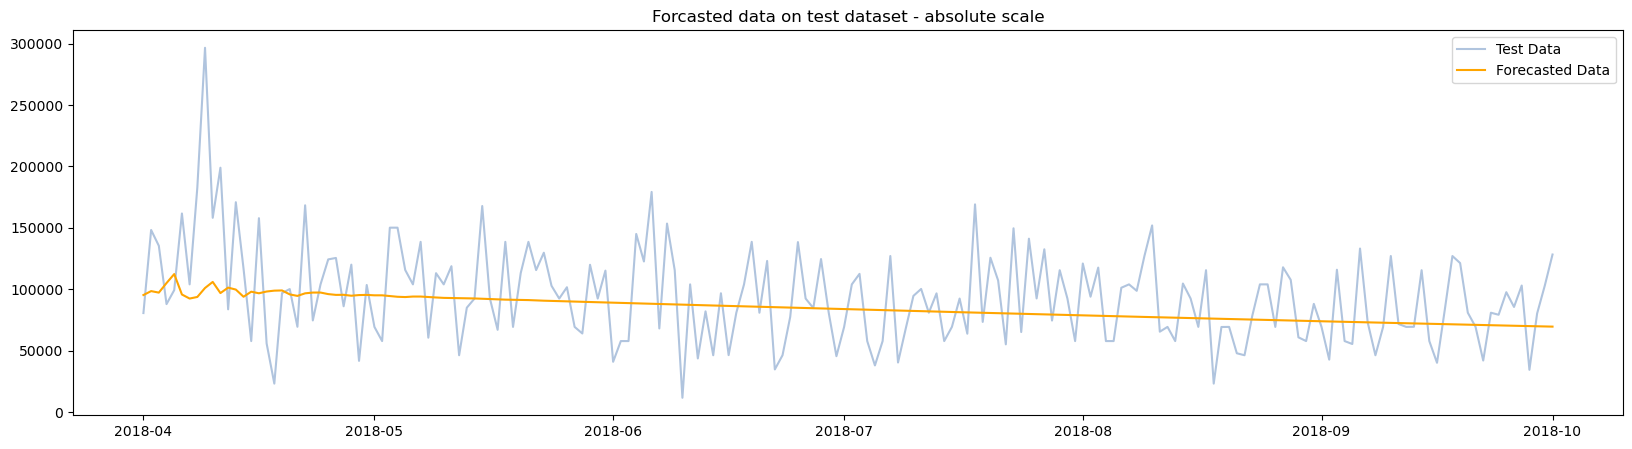

In [9]:
# Forcasted data in absolute scale

Train = np.exp(train_tablet['Sessions'])
Test = np.exp(test_tablet['Sessions'])
Forecast = np.exp(results)

plt.figure(figsize=[20,5])
plt.plot(Train, color='blue', label='Train Data')
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on whole dataset - absolute scale')
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on test dataset - absolute scale')
plt.legend()
plt.show()

---
## Time Series Forecasting with SARIMA

In [10]:
# Generate all different combinations of p, q and q triplets

p = range(0, 10)
d = range(0, 4)
q = range(0, 4)

pdq = list(itertools.product(p, d, q))

In [11]:
best_mape = float('inf')
best_order = None

for order in pdq:
    p, d, q = order

    model_SARIMA = SARIMAX(train_tablet['Sessions'], 
                    exog=None,
                    order=(p, d, q),
                    seasonal_order=(0, 0, 0, 0),
                    trend=None,
                    enforce_stationarity=True,
                    enforce_invertibility=False, 
                    freq='D')
    
    results = model_SARIMA.fit()
    results = results.forecast(steps=len(test_tablet))
   
    mape = mean_absolute_percentage_error(test_tablet['Sessions'], results)
    print(f'(p, d, q) order: {order}, with MAPE = {round(mape*100, 2)}%')

    if mape < best_mape:
        best_mape = mape
        best_order = order
        
print('-------------------------------------------------')
print('Best model:')
print(f'(p, d, q) -> {best_order} with MAPE = {round(best_mape*100, 2)}%')


(p, d, q) order: (0, 0, 0), with MAPE = 100.0%
(p, d, q) order: (0, 0, 1), with MAPE = 99.7%
(p, d, q) order: (0, 0, 2), with MAPE = 99.3%
(p, d, q) order: (0, 0, 3), with MAPE = 99.08%
(p, d, q) order: (0, 1, 0), with MAPE = 3.25%
(p, d, q) order: (0, 1, 1), with MAPE = 3.38%
(p, d, q) order: (0, 1, 2), with MAPE = 3.46%
(p, d, q) order: (0, 1, 3), with MAPE = 3.51%
(p, d, q) order: (0, 2, 0), with MAPE = 97.42%
(p, d, q) order: (0, 2, 1), with MAPE = 3.28%
(p, d, q) order: (0, 2, 2), with MAPE = 3.2%
(p, d, q) order: (0, 2, 3), with MAPE = 3.25%
(p, d, q) order: (0, 3, 0), with MAPE = 32504.4%
(p, d, q) order: (0, 3, 1), with MAPE = 72.04%
(p, d, q) order: (0, 3, 2), with MAPE = 3.53%
(p, d, q) order: (0, 3, 3), with MAPE = 5.25%
(p, d, q) order: (1, 0, 0), with MAPE = 5.8%
(p, d, q) order: (1, 0, 1), with MAPE = 3.37%
(p, d, q) order: (1, 0, 2), with MAPE = 3.44%
(p, d, q) order: (1, 0, 3), with MAPE = 3.05%
(p, d, q) order: (1, 1, 0), with MAPE = 3.18%
(p, d, q) order: (1, 1, 1), w

In [12]:
model_SARIMA = SARIMAX(train_tablet['Sessions'], 
                exog=None,
                order=(best_order[0], best_order[1], best_order[2]),
                seasonal_order=(0, 0, 0, 0),
                trend=None,
                enforce_stationarity=True,
                enforce_invertibility=False, 
                freq='D')

results = model_SARIMA.fit()
print(results.summary())

results = results.forecast(steps = len(test_tablet))

                               SARIMAX Results                                
Dep. Variable:               Sessions   No. Observations:                 1551
Model:               SARIMAX(4, 0, 0)   Log Likelihood                -721.375
Date:                Sat, 21 Oct 2023   AIC                           1452.751
Time:                        22:17:02   BIC                           1479.484
Sample:                    01-01-2014   HQIC                          1462.693
                         - 03-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3649      0.023     15.991      0.000       0.320       0.410
ar.L2          0.2622      0.023     11.375      0.000       0.217       0.307
ar.L3          0.1624      0.025      6.407      0.0

In [13]:
y_test = test_tablet['Sessions']
y_pred = results

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Preformance metrics for SARIMA model:')
print('--------------------------------------')
print('MAE:   ', round(mae, 2))
print('RMSE:  ', round(rmse, 2))
print('R2:    ', round(r2*100, 2))
print('MAPE:  ', round(mape*100, 2), '%')

Preformance metrics for SARIMA model:
--------------------------------------
MAE:    0.33
RMSE:   0.43
R2:     5.42
MAPE:   2.98 %


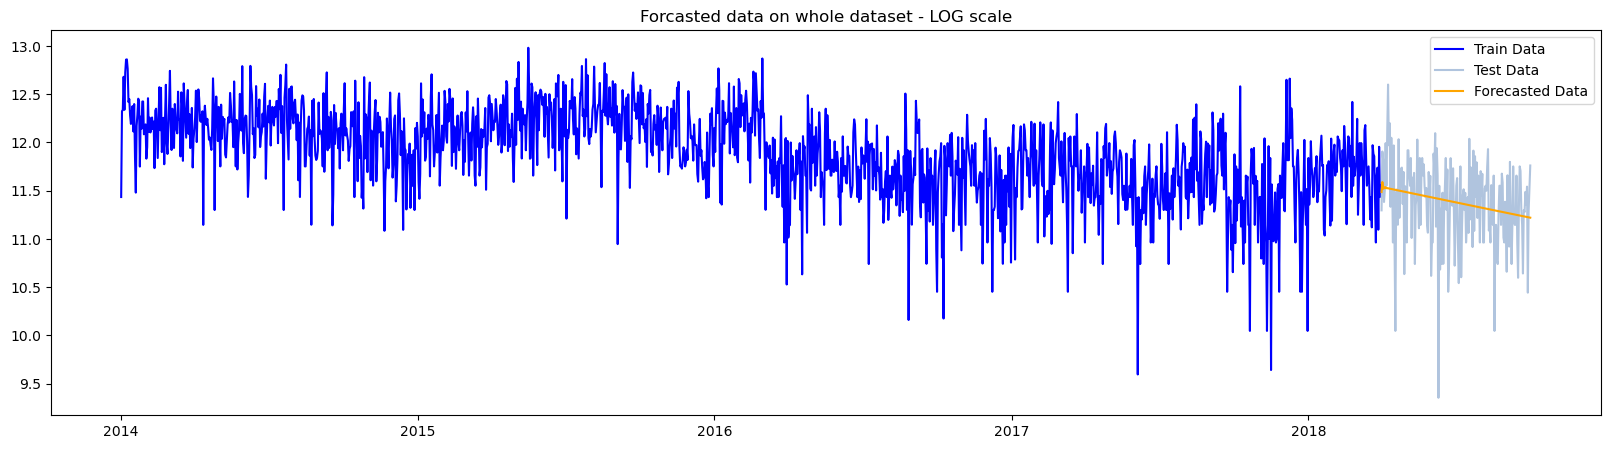

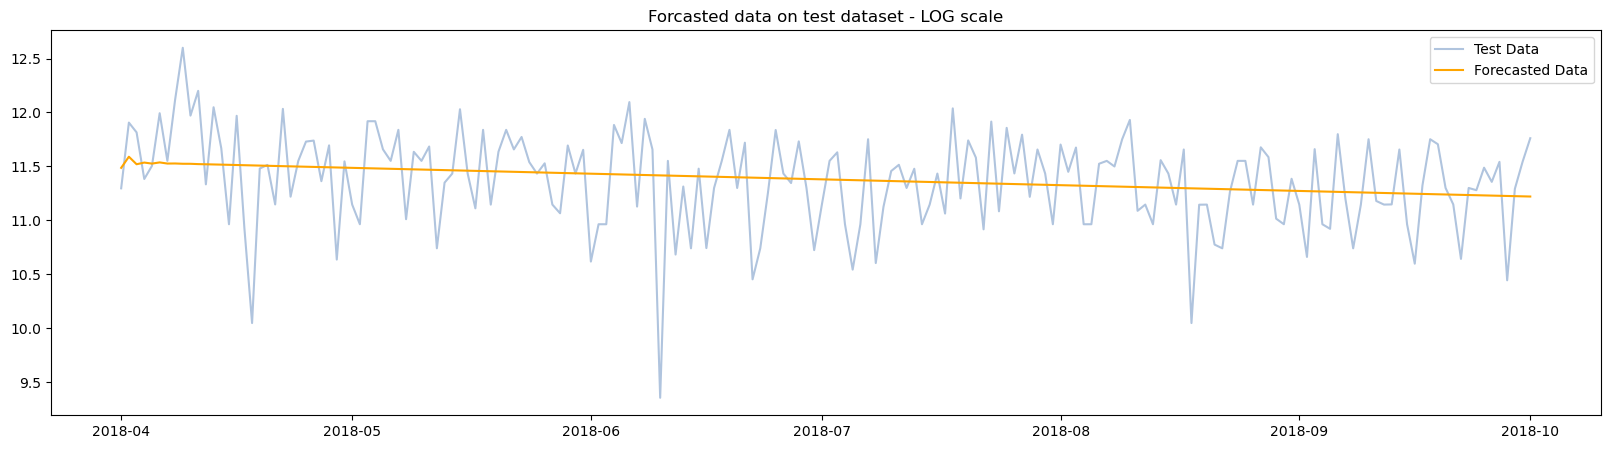

In [14]:
# Forcasted data in LOG scale

Train = train_tablet['Sessions']
Test = test_tablet['Sessions']
Forecast = results

plt.figure(figsize=[20,5])
plt.plot(Train, color='blue', label='Train Data')
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on whole dataset - LOG scale')
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on test dataset - LOG scale')
plt.legend()
plt.show()

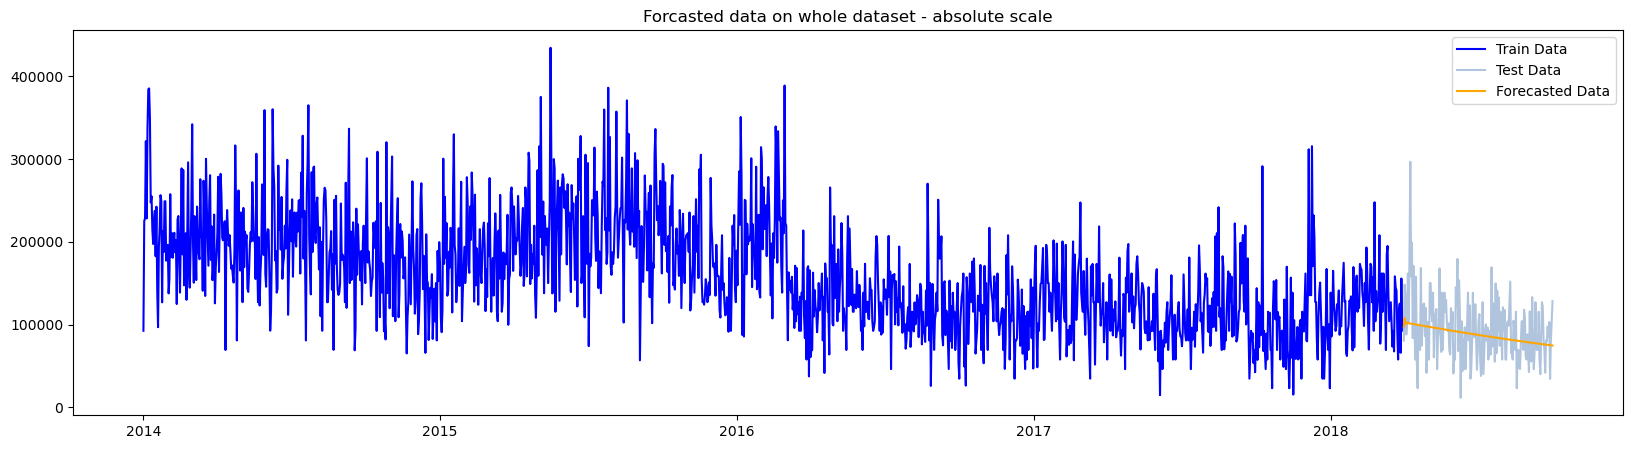

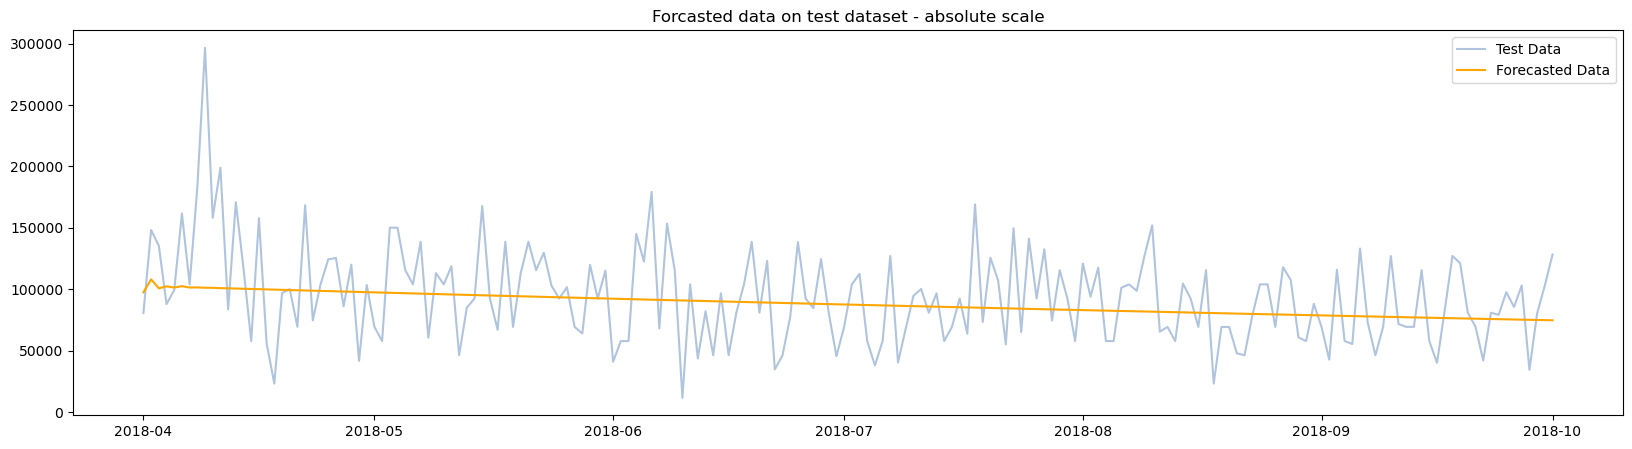

In [15]:
# Forcasted data in absolute scale

Train = np.exp(train_tablet['Sessions'])
Test = np.exp(test_tablet['Sessions'])
Forecast = np.exp(results)

plt.figure(figsize=[20,5])
plt.plot(Train, color='blue', label='Train Data')
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on whole dataset - absolute scale')
plt.legend()
plt.show()

plt.figure(figsize=[20,5])
plt.plot(Test, color='lightsteelblue', label='Test Data')
plt.plot(Forecast, color='orange', label='Forecasted Data')
plt.title('Forcasted data on test dataset - absolute scale')
plt.legend()
plt.show()

#
---
## Time Series Forecasting with PROPHET

In [16]:
df_org = pd.read_csv('df_tablet_final.csv', parse_dates=['Date'])
df = df_org.copy()

In [17]:
df.rename(columns={'Date': 'ds', 'Sessions': 'y'}, inplace=True)

In [18]:
# Train-test split 
train_tablet = df.loc[df['ds'] <  pd.Timestamp('2018-04-01')]
test_tablet  = df.loc[df['ds'] >= pd.Timestamp('2018-04-01')]

In [19]:
parameters = {
#     'n_changepoints': [1, 5, 10, 13, 14, 15, 16, 17, 18, 20], 
#     'changepoint_range': np.arange(0.75, 0.85, 0.01)}

    'n_changepoints': [1], 
    'changepoint_range': np.arange(0.45, 0.55, 0.005)}

parameter_grid = ParameterGrid(parameters)

best_mape = float('inf')
best_parameters = None

for param_set in parameter_grid:
    n_changepoints = param_set['n_changepoints']
    changepoint_range = param_set['changepoint_range']
    
    model = prophet.Prophet(
        growth='linear',
        changepoints=None,
        n_changepoints=n_changepoints,
        changepoint_range=changepoint_range,
        yearly_seasonality='auto',
        weekly_seasonality='auto',
        daily_seasonality='auto',
        holidays=None
    )
    
    model.fit(train_tablet)
    
    future = model.make_future_dataframe(periods=test_tablet.shape[0], freq='D')
    results = model.predict(future)
    
    mape = mean_absolute_percentage_error(test_tablet['y'], results['yhat'][-len(test_tablet['y']):])
    
    print(f'MAPE = {round(mape*100, 2)}% - n_changepoints = {n_changepoints}, changepoint_range = {changepoint_range}')
    
    if mape < best_mape:
        best_mape = mape
        best_parameters = param_set

print(f'Best parameters: {best_parameters}, MAPE = {round(best_mape*100, 2)}%')

22:17:05 - cmdstanpy - INFO - Chain [1] start processing
22:17:05 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.96% - n_changepoints = 1, changepoint_range = 0.45


22:17:07 - cmdstanpy - INFO - Chain [1] start processing
22:17:07 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.96% - n_changepoints = 1, changepoint_range = 0.455


22:17:08 - cmdstanpy - INFO - Chain [1] start processing
22:17:08 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.96% - n_changepoints = 1, changepoint_range = 0.46


22:17:09 - cmdstanpy - INFO - Chain [1] start processing
22:17:09 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.96% - n_changepoints = 1, changepoint_range = 0.465


22:17:10 - cmdstanpy - INFO - Chain [1] start processing
22:17:11 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.96% - n_changepoints = 1, changepoint_range = 0.47000000000000003


22:17:12 - cmdstanpy - INFO - Chain [1] start processing
22:17:12 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.95% - n_changepoints = 1, changepoint_range = 0.47500000000000003


22:17:13 - cmdstanpy - INFO - Chain [1] start processing
22:17:13 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.95% - n_changepoints = 1, changepoint_range = 0.48000000000000004


22:17:14 - cmdstanpy - INFO - Chain [1] start processing
22:17:14 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.95% - n_changepoints = 1, changepoint_range = 0.48500000000000004


22:17:15 - cmdstanpy - INFO - Chain [1] start processing
22:17:15 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.95% - n_changepoints = 1, changepoint_range = 0.49000000000000005


22:17:17 - cmdstanpy - INFO - Chain [1] start processing
22:17:17 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.95% - n_changepoints = 1, changepoint_range = 0.49500000000000005


22:17:18 - cmdstanpy - INFO - Chain [1] start processing
22:17:18 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.95% - n_changepoints = 1, changepoint_range = 0.5


22:17:19 - cmdstanpy - INFO - Chain [1] start processing
22:17:19 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.95% - n_changepoints = 1, changepoint_range = 0.5050000000000001


22:17:20 - cmdstanpy - INFO - Chain [1] start processing
22:17:20 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.95% - n_changepoints = 1, changepoint_range = 0.51


22:17:22 - cmdstanpy - INFO - Chain [1] start processing
22:17:22 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.95% - n_changepoints = 1, changepoint_range = 0.5150000000000001


22:17:23 - cmdstanpy - INFO - Chain [1] start processing
22:17:23 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.95% - n_changepoints = 1, changepoint_range = 0.52


22:17:24 - cmdstanpy - INFO - Chain [1] start processing
22:17:24 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.95% - n_changepoints = 1, changepoint_range = 0.5250000000000001


22:17:25 - cmdstanpy - INFO - Chain [1] start processing
22:17:25 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.95% - n_changepoints = 1, changepoint_range = 0.53


22:17:26 - cmdstanpy - INFO - Chain [1] start processing
22:17:26 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.95% - n_changepoints = 1, changepoint_range = 0.5350000000000001


22:17:28 - cmdstanpy - INFO - Chain [1] start processing
22:17:28 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.95% - n_changepoints = 1, changepoint_range = 0.54


22:17:29 - cmdstanpy - INFO - Chain [1] start processing
22:17:29 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.95% - n_changepoints = 1, changepoint_range = 0.5450000000000002


22:17:30 - cmdstanpy - INFO - Chain [1] start processing
22:17:30 - cmdstanpy - INFO - Chain [1] done processing


MAPE = 2.95% - n_changepoints = 1, changepoint_range = 0.55
Best parameters: {'changepoint_range': 0.5150000000000001, 'n_changepoints': 1}, MAPE = 2.95%


In [20]:
model = prophet.Prophet(
    growth='linear',
    changepoints=None,
    n_changepoints=best_parameters['n_changepoints'],
    changepoint_range=best_parameters['changepoint_range'],
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None
)

model.fit(train_tablet)

future = model.make_future_dataframe(periods=test_tablet.shape[0], freq='D')
results = model.predict(future)

22:17:31 - cmdstanpy - INFO - Chain [1] start processing
22:17:31 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
y_test = test_tablet['y']
y_pred = results['yhat'][-len(y_test):]

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Preformance metrics for PROPHET model:')
print('--------------------------------------')
print('MAE:   ', round(mae, 2))
print('RMSE:  ', round(rmse, 2)) 
print('R2:    ', round(r2*100, 2))
print('MAPE:  ', round(mape*100, 2), '%') 

Preformance metrics for PROPHET model:
--------------------------------------
MAE:    0.33
RMSE:   0.42
R2:     7.58
MAPE:   2.95 %


<Figure size 2000x800 with 0 Axes>

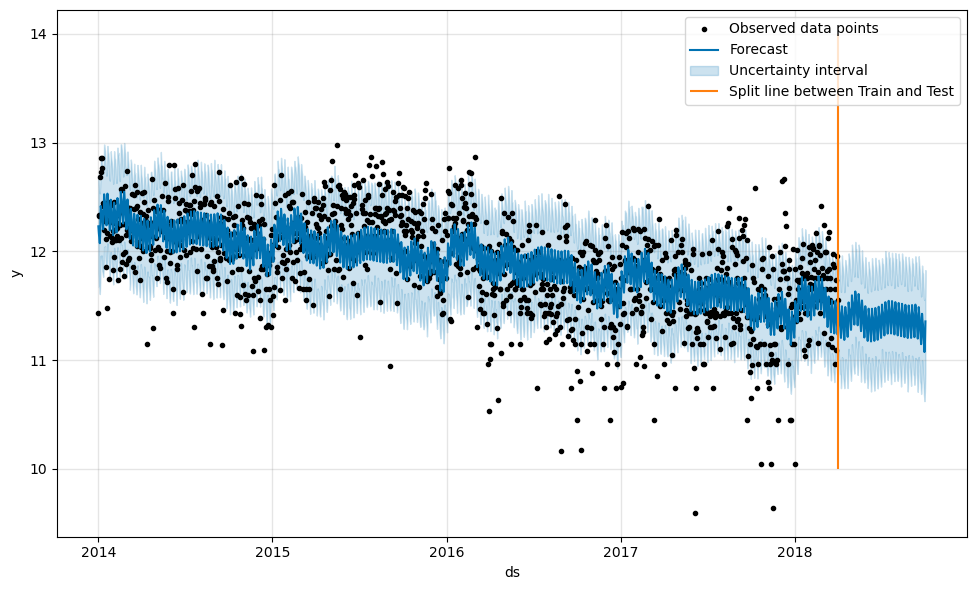

In [22]:
plt.figure(figsize=(20,8))
fig = model.plot(results)
plt.vlines(pd.Timestamp('2018-04-01'), 10, 14, color='tab:orange', label='Split line between Train and Test')
plt.legend()
plt.show()

In [23]:
fig = plot_components_plotly(model, results)
fig.update_layout(title='Trend, yearly seasonality and weekly seasonality')

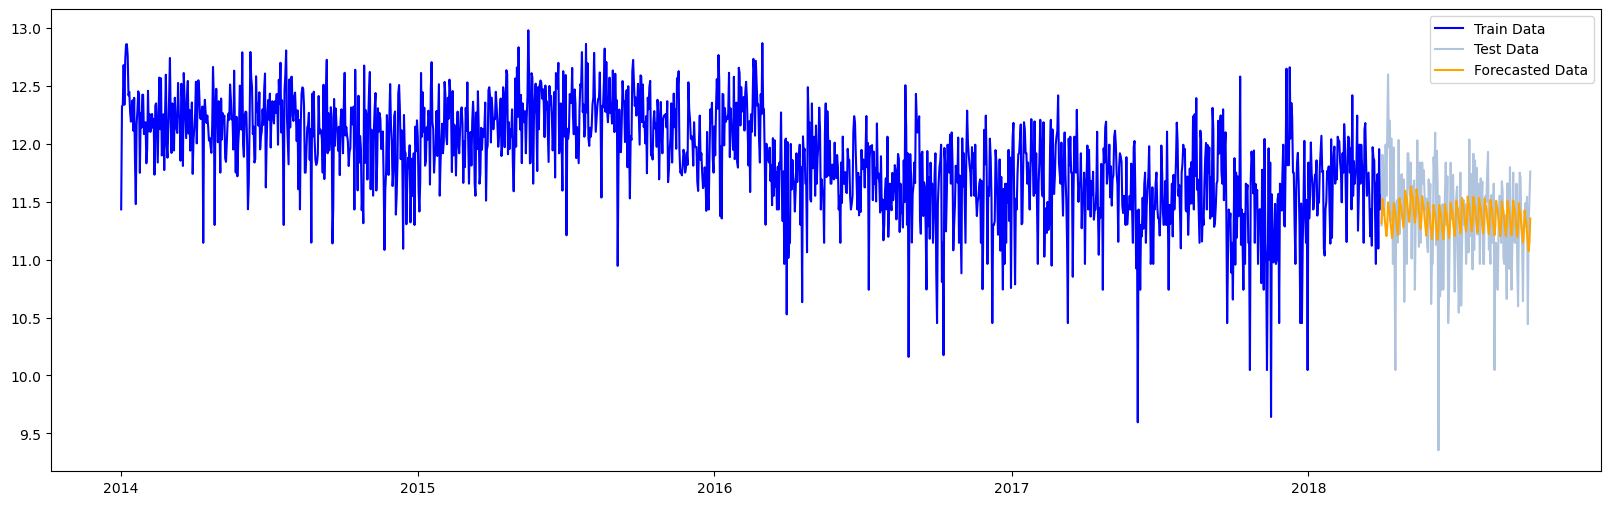

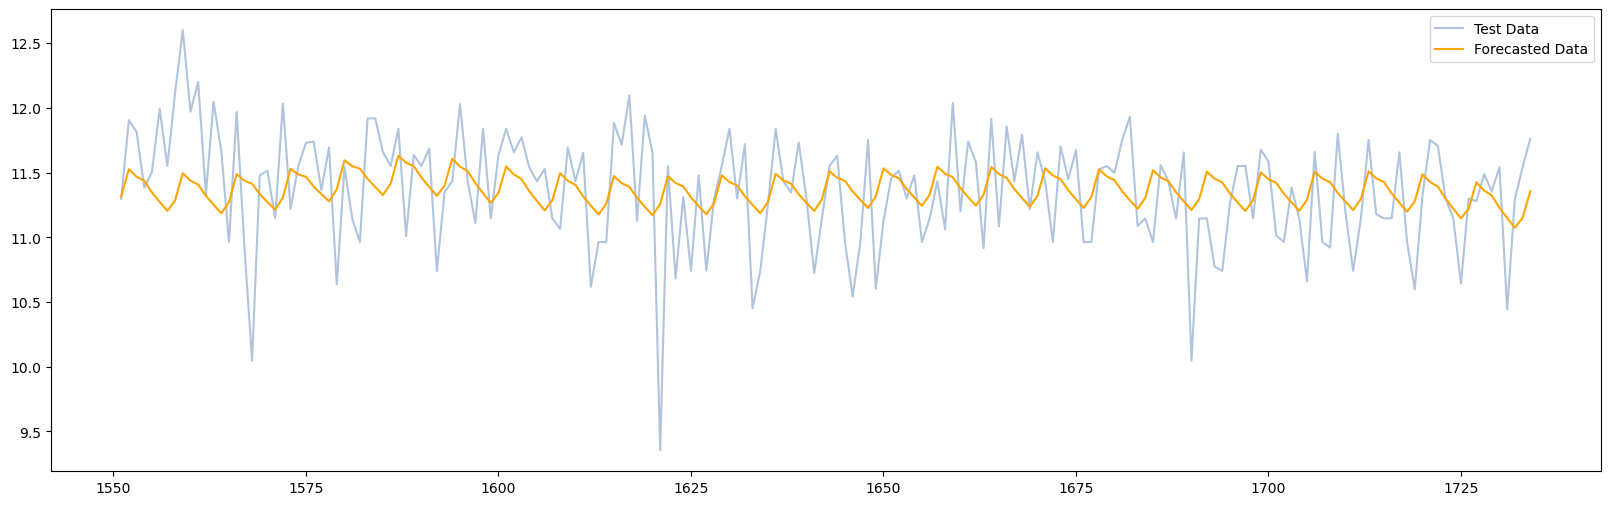

In [24]:
x_train = train_tablet['ds']
y_train = train_tablet['y']

x_test = test_tablet['ds']
y_test = test_tablet['y']

x_pred = df['ds'][-len(x_test):]
y_pred = results['yhat'][-len(y_test):]

plt.figure(figsize=(20,6))
plt.plot(x_train, y_train, color='blue', label='Train Data')
plt.plot(x_test, y_test, color='lightsteelblue', label='Test Data')
plt.plot(x_pred, y_pred, color='orange', label='Forecasted Data')
plt.legend()
plt.show()

plt.figure(figsize=(20,6))
plt.plot(y_test, color='lightsteelblue', label='Test Data')
plt.plot(y_pred, color='orange', label='Forecasted Data')
plt.legend()
plt.show()

---
# RESULTS

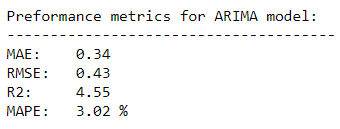
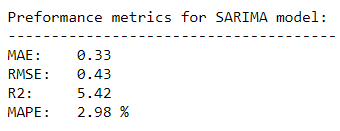
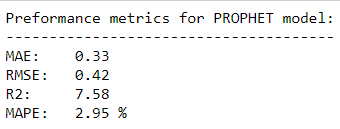


# CONCLUSION
All of the models demonstrated NOT SO GOOD forecasting performance on the test dataset, as evidenced by both visual representation of the predictions and the comprehensive evaluation metrics used.
However PROPHET model is preforming best of all models.

Note: These metrics are calculated on the test split of the dataset. In a real forecasting model, such tests can only be done after the forecast period.

---